In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
clean_data_to_load = "clean_data.csv"
perf = "clean_data.csv"
incomedata = "IncomePerfData.csv"
# Convert csv files to dataframes
clean_data =pd.read_csv(clean_data_to_load)
perfdata = pd.read_csv(perf)
incomeData = pd.read_csv(incomedata)

df = pd.DataFrame(clean_data)
perfdata = pd.DataFrame(perfdata)
incomeData = pd.DataFrame(incomeData)

corr_math_read = df['MathPercentile'].corr(df['ReadPercentile'])
corr_math_read


0.8888732480064978

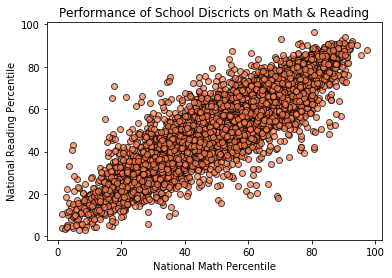

<Figure size 432x288 with 0 Axes>

In [2]:

math = df['MathPercentile']
read = df['ReadPercentile']

# Build the scatter plots for each city types
plt.scatter(math, 
            read, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7)


# Incorporate the other graph properties
plt.title("Performance of School Discricts on Math & Reading")
plt.ylabel("National Reading Percentile")
plt.xlabel("National Math Percentile")
plt.show()
#lgnd = plt.legend(fontsize="small", mode="Expanded",                   
#                  numpoints=1, scatterpoints=1, 
#                 loc="best", title="City Types", 
#                  labelspacing=0.5)
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]


# Save Figure
plt.savefig("Math_Reading.png")

In [3]:
corr_math_read


0.8888732480064978

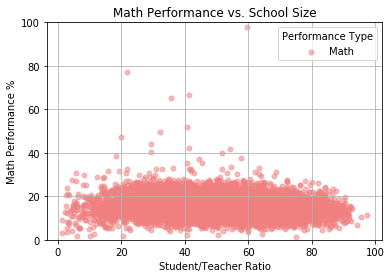

In [4]:
# Build the scatter plot student/teacher ratio by math performance
df.plot(kind='scatter',x='MathPercentile', y='Student/Teacher Ratio',
                       color='lightcoral', ylim=(0,100), label = 'Math', alpha = 0.5, linewidths = 1.5)    

# Incorporate the other graph properties
plt.title("Math Performance vs. School Size")
plt.xlabel("Student/Teacher Ratio")
plt.ylabel("Math Performance %")
plt.grid(True)

# Create a legend
plt.legend(title = 'Performance Type')

# Save Figure
plt.savefig("math_ratio_scatter.png")

# Show plot
plt.show()

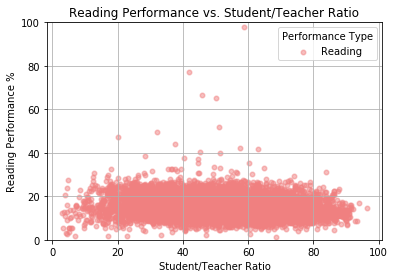

In [5]:
# Build the scatter plot student/teacher ratio by reading performance
df.plot(kind='scatter',x='ReadPercentile', y='Student/Teacher Ratio',
                       color='lightcoral', ylim=(0,100), label = 'Reading', alpha = 0.5, linewidths = 1.5)    


# Incorporate the other graph properties
plt.title("Reading Performance vs. Student/Teacher Ratio")
plt.xlabel("Student/Teacher Ratio")
plt.ylabel("Reading Performance %")
plt.grid(True)

# Create a legend
plt.legend(title = 'Performance Type')

# Save Figure
plt.savefig("reading_ratio_scatter.png")

# Show plot
plt.show()


In [6]:
# Calculate average student/teacher ratio by state

average_ratio = df.groupby("State Abbreviation")["Student/Teacher Ratio"].mean()
average_ratio = pd.DataFrame(average_ratio).reset_index()
average_ratio = average_ratio.rename(columns = {'Student/Teacher Ratio': 'Student/Teacher Ratio'})
average_ratio = average_ratio.sort_values ('Student/Teacher Ratio', ascending=False)

average_ratio.head()

,State Abbreviation,Student/Teacher Ratio
4,CA,21.834424
3,AZ,18.447565
13,IN,18.312343
20,MI,18.153139
34,OR,18.107630


In [7]:
# Calculate total schools by State

state_schools = df.groupby("State Abbreviation")["Total Schools"].sum()
state_schools = pd.DataFrame(state_schools).reset_index()
state_schools = state_schools.rename(columns = {'Total Schools': 'Total Schools'})
state_schools = state_schools.sort_values ('Total Schools', ascending=False)
state_schools.to_csv("state_schools.csv")
state_schools.head()


,State Abbreviation,Total Schools
4,CA,9664.0
40,TX,8981.0
8,FL,4427.0
12,IL,3757.0
32,OH,3288.0


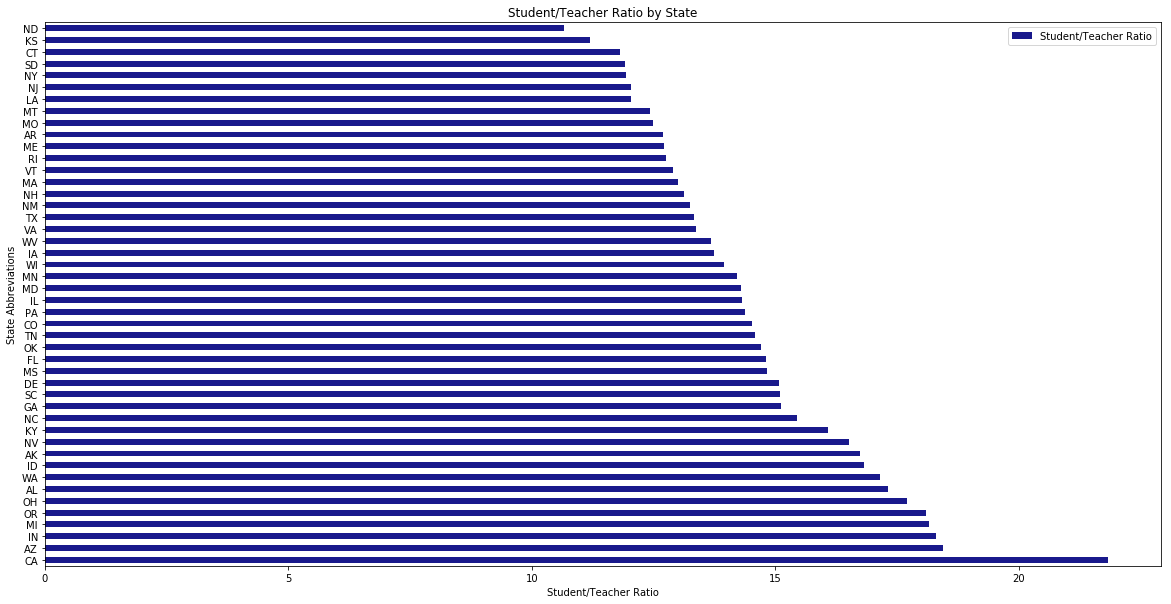

In [8]:
# Create Bar chart of Student/Teacher ratio by State

stateratio = average_ratio.plot.barh(x='State Abbreviation', alpha=0.9, colormap = 'jet', align="center", figsize=(20,10))
plt.title("Student/Teacher Ratio by State")
plt.xlabel("Student/Teacher Ratio")
plt.ylabel("State Abbreviations")

# Save Figure
plt.savefig("state_ratio.png")

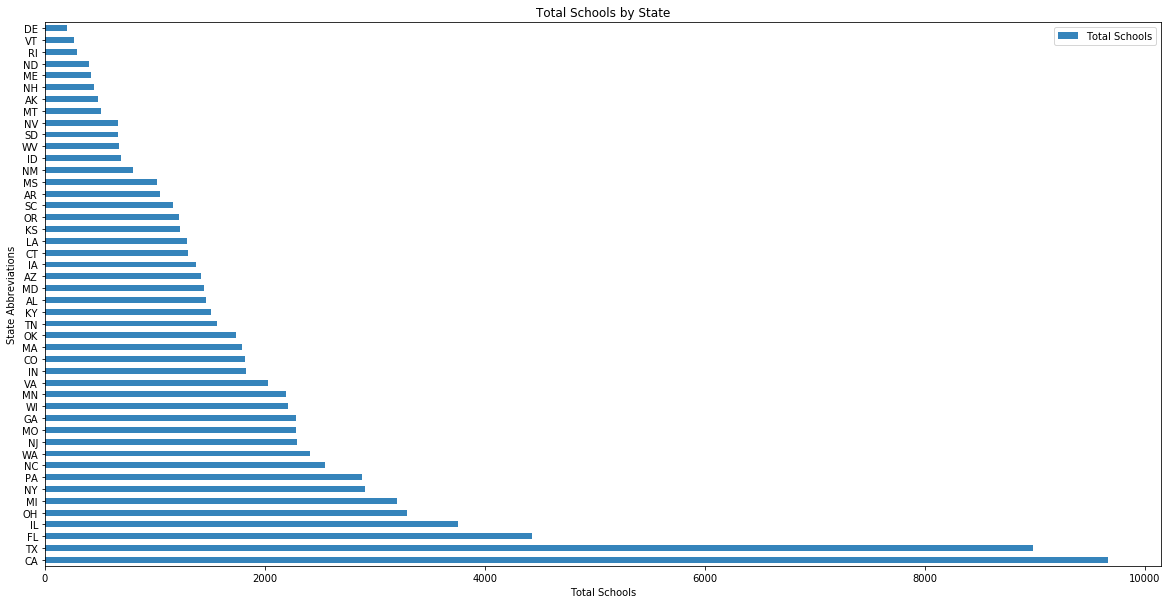

In [9]:
# Create Bar chart of total schools by State

totalschools = state_schools.plot.barh(x='State Abbreviation', alpha=0.9, align="center", figsize=(20,10))
plt.title("Total Schools by State")
plt.xlabel("Total Schools")
plt.ylabel("State Abbreviations")

# Save Figure
plt.savefig("total_schools.png")



In [10]:
#Filter for districts within 70th percentile for math and/or reading
state_hi_math = perfdata.loc[perfdata["MathPercentile"] >= 70]
state_hi_read = perfdata.loc[perfdata["ReadPercentile"] >= 70]

# number of Districts with >70th percentile for math and/or reading BY STATE
state_hi_math_count=state_hi_math.groupby(['State'])['NCES District ID'].count().reset_index().rename(columns={"NCES District ID": "Hi_Math_Districts"})
state_hi_read_count=state_hi_read.groupby(['State'])['NCES District ID'].count().reset_index().rename(columns={"NCES District ID": "Hi_Read_Districts"})
school_count_state=perfdata.groupby(['State'])['NCES District ID'].count().reset_index().rename(columns={"NCES District ID": "All_Districts"})

#Change Index to "State"
#state_hi_math_count2 = state_hi_math_count.set_index('State')
#state_hi_read_count2 = state_hi_read_count.set_index('State')
#school_count_state2 = school_count_state.set_index('State')

#Merge 3 tables (All, Hi Math, Hi Read) - two steps
first_merge = school_count_state .merge(state_hi_math_count, on = 'State', how ='outer')
final_merge = first_merge.merge(state_hi_read_count, on = 'State' , how ='outer')
Final_merge_no_Nan=final_merge.fillna(0)

#Calculate performance percentages
Final_merge_no_Nan['% Hi Math'] = (Final_merge_no_Nan['Hi_Math_Districts'] / Final_merge_no_Nan['All_Districts'])
Final_merge_no_Nan['% Hi Read'] = (Final_merge_no_Nan['Hi_Read_Districts'] / Final_merge_no_Nan['All_Districts'])
Final_merge_no_Nan


#All States with performace percentages filtered as only two columns.
hi_math_shares_byState= Final_merge_no_Nan.filter(['State', '% Hi Math'], axis = 1)
hi_read_shares_byState= Final_merge_no_Nan.filter(['State', '% Hi Read'], axis = 1)

#Hi states percent of high perfance districts sorted (top 10, bottom 10)
math_states_top10 = (hi_math_shares_byState.sort_values(hi_math_shares_byState.columns[1], ascending = False)).head(10)
math_states_bottom10 = (hi_math_shares_byState.sort_values(hi_math_shares_byState.columns[1], ascending = True)).head(10)

read_states_top10 = (hi_read_shares_byState.sort_values(hi_read_shares_byState.columns[1], ascending = False)).head(10)
read_states_bottom10 = (hi_read_shares_byState.sort_values(hi_read_shares_byState.columns[1], ascending = True)).head(10)


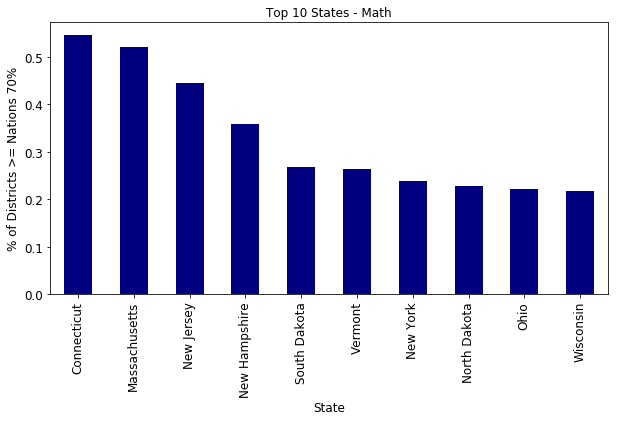

In [11]:
# Chart Creation - MATH TOP 10 STATES
Top10_Math_plot= math_states_top10[['% Hi Math']].plot(kind='bar', title ="Top 10 States - Math", figsize=(10, 5), colormap = 'jet', legend=False, fontsize=12)
Top10_Math_plot.set_xlabel('State', fontsize=12)
Top10_Math_plot.set_ylabel('% of Districts >= Nations 70%', fontsize=12)
Top10_Math_plot.set_xticklabels(math_states_top10['State'],fontsize=12)
plt.savefig("Math-Top 10.jpg")
plt.show()

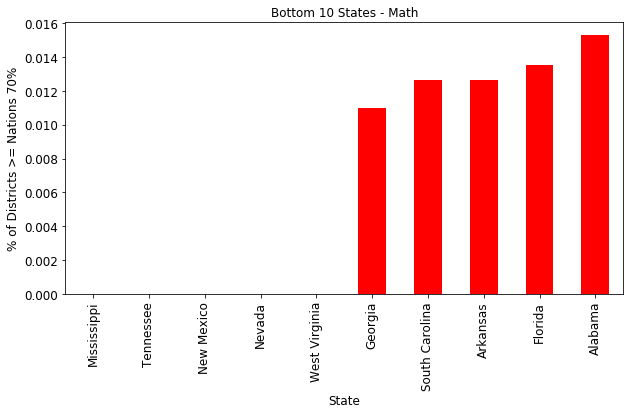

In [12]:
# Chart Creation - MATH BOTTOM !0 STATES
Bottom10_Math_plot= math_states_bottom10[['% Hi Math']].plot(kind='bar', title ="Bottom 10 States - Math", figsize=(10, 5), colormap = 'prism', legend=False, fontsize=12)
Bottom10_Math_plot.set_xlabel('State', fontsize=12)
Bottom10_Math_plot.set_ylabel('% of Districts >= Nations 70%', fontsize=12)
Bottom10_Math_plot.set_xticklabels(math_states_bottom10['State'],fontsize=12)
plt.savefig("Math-Bottom 10.png")
plt.show()

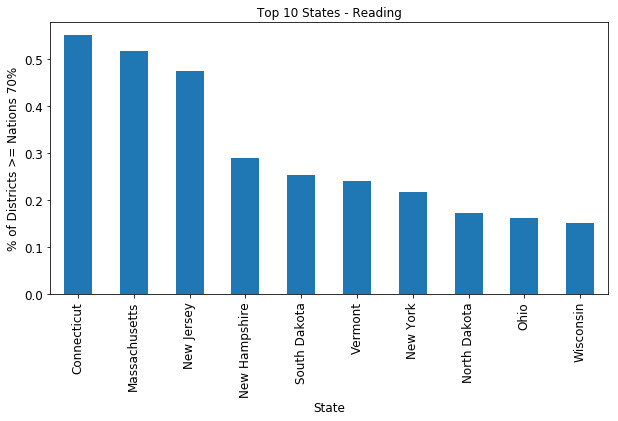

In [13]:
# Chart Creation - READING TOP !0 STATES
Top10_Read_plot= read_states_top10[['% Hi Read']].plot(kind='bar', title ="Top 10 States - Reading", figsize=(10, 5), legend=False, fontsize=12)
Top10_Read_plot.set_xlabel('State', fontsize=12)
Top10_Read_plot.set_ylabel('% of Districts >= Nations 70%', fontsize=12)
Top10_Read_plot.set_xticklabels(math_states_top10['State'],fontsize=12)
plt.savefig("Read-Top 10.png")
plt.show()

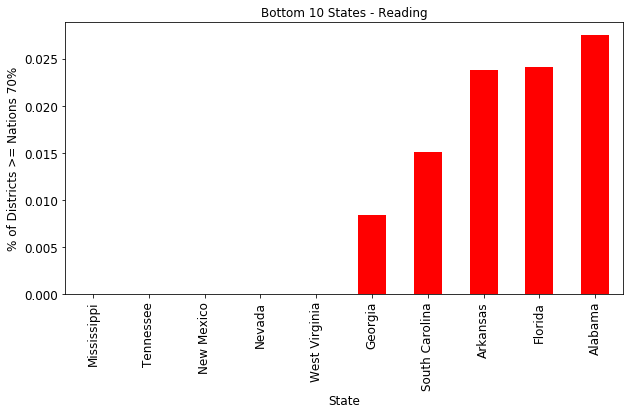

In [14]:
# Chart Creation - READING bottom !0 STATES
bottom10_Read_plot= read_states_bottom10[['% Hi Read']].plot(kind='bar', title ="Bottom 10 States - Reading", colormap = 'prism',figsize=(10, 5), legend=False, fontsize=12)
bottom10_Read_plot.set_xlabel('State', fontsize=12)
bottom10_Read_plot.set_ylabel('% of Districts >= Nations 70%', fontsize=12)
bottom10_Read_plot.set_xticklabels(math_states_bottom10['State'],fontsize=12)
plt.savefig("Read-bottom 10.png")
plt.show()

In [15]:
#Declaring variables to use for the following two graphs
Income = incomeData['Income']
Read = incomeData['ReadPercentile']
Math = incomeData["MathPercentile"]

,Unnamed: 0,NCES District ID,District Name,Public District Name,"Charter (1=Yes, 0=No)",City,County,Zip,State,State Abbreviation,MathPercentile,ReadPercentile,GEO.display-label Geography,Income
0,0,2509390.0,PELHAM,Pelham,0,AMHERST,HAMPSHIRE,1002.0,Massachusetts,MA,97.25,87.80,ZCTA5,52379.0
1,1,2501920.0,AMHERST-PELHAM,Amherst-Pelham,0,AMHERST,HAMPSHIRE,1002.0,Massachusetts,MA,84.65,81.89,ZCTA5,52379.0
2,2,2501890.0,AMHERST,Amherst,0,AMHERST,HAMPSHIRE,1002.0,Massachusetts,MA,76.61,73.73,ZCTA5,52379.0
3,3,2500001.0,QUABBIN,Quabbin,0,BARRE,WORCESTER,1005.0,Massachusetts,MA,67.83,66.60,ZCTA5,70325.0
4,4,2502430.0,BELCHERTOWN,Belchertown,0,BELCHERTOWN,HAMPSHIRE,1007.0,Massachusetts,MA,68.37,67.18,ZCTA5,86165.0


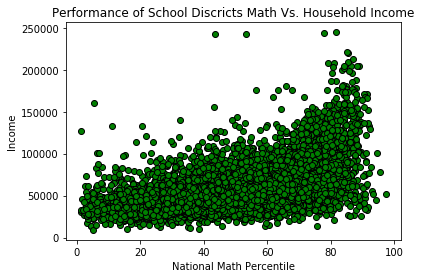

In [16]:
plt.scatter(Math, 
            Income, c="green", 
            edgecolor="black", linewidths=1, marker="o")


plt.title("School District Math Scores Vs. Household Income")
plt.ylabel("Income")
plt.xlabel("National Math Percentile")
plt.savefig("Math_vs._Income.png")

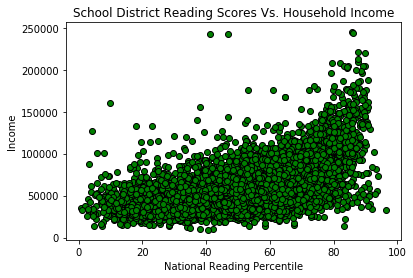

In [22]:
plt.scatter(Read, Income, c="green", 
            edgecolor="black", linewidths=1, marker="o")


# Incorporate the other graph properties
plt.title("School District Reading Scores Vs. Household Income")
plt.ylabel("Income")
plt.xlabel("National Reading Percentile")
plt.savefig("Reading_vs._Income.png")

In [25]:
mathNincome = incomeData['MathPercentile'].corr(incomeData['Income'])
readingNincome = incomeData["ReadPercentile"].corr(incomeData['Income'])

In [30]:
print("Correlation of Math vs. Income: " + str(mathNincome))
print("Correlation of Reading Vs. Income: " + str(readingNincome))

Correlation of Math vs. Income: 0.5046216968768742
Correlation of Reading Vs. Income: 0.5384855415740791
